## Problem Tanımı

**Veri Seti:** UCI Heart Disease Dataset  
**Amaç:** Bireylerin çeşitli sağlık verilerine göre kalp hastalığı riski olup olmadığını tahmin etmek.  
**Hedef Değişken:** `target` (1 = kalp hastalığı var, 0 = yok)

**Projenin *Önemi*:**
Kalp hastalıkları, dünya genelinde en yaygın ölüm nedenlerinden biridir. Dünya Sağlık Örgütü'ne (WHO) göre, her yıl yaklaşık 17.9 milyon insan kalp-damar hastalıkları nedeniyle hayatını kaybetmektedir. Bu durum, erken teşhis ve önleyici tedavilerin ne kadar hayati olduğunu açıkça göstermektedir.


### Veri Seti Sütun Açıklamaları

**id**  
Her hastaya özel bir numara. Veri setindeki kayıtların kimlik numarasıdır (analizde kullanılmaz).

**age**  
Hastanın yaşı. Kalp hastalığı riski yaşla birlikte artabilir.

**sex**  
Cinsiyet bilgisi. Genellikle "male" (erkek) ve "female" (kadın) olarak yer alır.

**dataset**  
Kaynağın geldiği veri setinin ismi veya etiketi. Veri setinin farklı alt kümelerini ayırt etmek için kullanılır.

**cp**  
Göğüs ağrısı tipi. Göğüs ağrısının şekline göre sınıflandırılmıştır (örneğin: typical angina, asymptomatic gibi). Kalp hastalığı riskiyle yakından ilgilidir.

**trestbps**  
Dinlenme halindeki tansiyon değeri (mm Hg cinsinden). Yüksek tansiyon, kalp hastalığına işaret edebilir.

**chol**  
Kandaki kolesterol seviyesi (mg/dl). Yüksek kolesterol kalp hastalığı riskini artırır.

**fbs**  
Açlık kan şekeri 120 mg/dl'den büyük mü? Genellikle "true" / "false" olarak gösterilir.

**restecg**  
Kalbin dinlenme halindeki EKG (elektrokardiyogram) sonuçları. Kalpteki elektriksel aktivitenin normal olup olmadığını gösterir.

**thalch**  
Egzersiz sırasında ulaşılan maksimum kalp atım hızı (bpm). Kalp sağlığı açısından önemli bir ölçüttür.

**exang**  
Egzersiz sırasında göğüs ağrısı yaşanıp yaşanmadığı. Genellikle "yes" / "no" olarak gösterilir.

**oldpeak**  
Egzersiz sonrası EKG’de ST segmentinde görülen düşüş miktarı. Kalp stresi veya tıkanıklık göstergesi olabilir.

**slope**  
ST segmentinin egzersiz sırasındaki eğimi. Genellikle "up", "flat", "down" gibi değerler alır. Kalbin egzersize nasıl tepki verdiğini gösterir.

**ca**  
Damarların boyanarak (anjiyografi) incelendiği görüntülemede tespit edilen tıkalı damar sayısı. 0–3 arasında değişebilir.

**thal**  
Talasemi durumu veya kalp kası bozukluk türü. "normal", "fixed defect", "reversible defect" gibi sınıflandırmalar olabilir.

**num**  
Hedef değişken. Kalp hastalığının varlığı ve şiddeti hakkında bilgi verir.  
- 0 = kalp hastalığı yok  
- 1–4 = kalp hastalığı var (farklı seviyelerde)



# EDA ve Görselleştirme

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Veri setini yükleyelim
df = pd.read_csv("/content/heart_disease_uci.csv")

print(df.shape)

# İlk birkaç satıra göz atalım
df.head()

(920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = (df['target'] > 0).astype(int)

In [ ]:
# Veri tipi bilgisi ve eksik veri kontrolü
df.info()
df.isnull().sum()  # Eksik veri kontrolü

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
# İstatistiksel özet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
target,920.0,0.553261,0.497426,0.0,0.00,1.0,1.00,1.0


### Önemli Bulgular

#### 1. age (yaş)

- Ortalama yaş: **53.5**
- En genç birey: **28**, en yaşlı birey: **77**
- %50’si 54 yaş ve altında, %75’i 60 yaş ve altında
- Kalp hastalığı riski genellikle **orta yaş ve üzeri** grupta yoğunlaşmaktadır.

---

#### 2. trestbps (dinlenme kan basıncı - mmHg)

- Ortalama: **132 mmHg**, bu değer normalin biraz üzerinde
- En yüksek değer: **200 mmHg** — **tehlikeli düzeyde yüksek**
- Minimum değer: **0**, bu büyük ihtimalle **eksik veya hatalı veri**
- %75’lik kesim 140 mmHg ve altında

---

#### 3. chol (kolesterol - mg/dl)

- Ortalama: **199 mg/dl**
- Standart sapma yüksek (**110.7**) — **uç değerler çok fazla**
- Maksimum kolesterol değeri: **603 mg/dl** — **çok yüksek**
- Minimum değer: **0**, bu da muhtemelen **eksik veri**

---

#### 4. thalch (maksimum kalp atım hızı)

- Ortalama: **137 bpm**
- %50’si 140 bpm ve altında
- En yüksek değer: **202 bpm**, egzersiz sırasında oluşabilecek tepe değer
- Bu değer, kişinin **fiziksel aktiviteye verdiği tepkiyi** gösterir

---

#### 5. oldpeak (ST segment depresyonu)

- Ortalama: **0.87**, maksimum: **6.2**
- ST depresyonu arttıkça kalp hastalığı riski de artar
- Minimum değer: **-2.6**, bu muhtemelen **ölçüm hatası** veya yanlış veri girişi
- %75’lik kesim 1.5’in altında kalıyor — çoğunluk için düşük risk seviyesi

---

#### 6. ca (anjiyografi ile tespit edilen tıkalı damar sayısı)

- Ortalama: **0.67**, yani çoğu kişide **1 veya daha az damar tıkalı**
- Maksimum değer: **3** — bu ciddi tıkanıklık anlamına gelir
- Ancak bu sütunda sadece **309 geçerli veri** var (920 yerine), yani **veri eksikliği** önemli

---

#### 7. target (kalp hastalığı var/yok)

- Ortalama: **0.55**, yani veri setindeki kişilerin yaklaşık **%55’inde kalp hastalığı var**
- Minimum: **0** (hastalık yok), maksimum: **1** (hastalık var)
- Medyanın **1** olması, hastalık görülen kişi sayısının biraz daha fazla olduğunu gösterir
- Veri seti **dengeli bir sınıf dağılımına** sahip

---

#### Genel Yorumlar

- Bazı sütunlarda (örneğin `trestbps`, `chol`, `oldpeak`) **hatalı veya eksik değerler** olabilir, bu yüzden temizleme gerekebilir.
- Kolesterol, tansiyon ve kalp atım hızı gibi özelliklerde **uç değerler** mevcut; bu da veri setinin **çeşitliliğini** gösteriyor.
- `target` sütununun neredeyse eşit dağılım göstermesi, **sınıflandırma modeli** eğitimi için avantaj sağlar.

In [ ]:
# Kalp hastalığı olanların yaş ortalaması daha yüksek mi?
df.groupby("target")["age"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
target,,,,
0,50.547445,51.0,28,76
1,55.903733,57.0,31,77


In [ ]:
# Kalp hastalığı erkeklerde mi daha yaygın?
df.groupby("sex")["target"].value_counts(normalize=True).unstack()

target,0,1
sex,,
Female,0.742268,0.257732
Male,0.367769,0.632231


In [ ]:
# Hangi göğüs ağrısı tipi daha çok kalp hastalığıyla ilişkilendiriliyor?
df.groupby("cp")["target"].mean()  # cp tipi arttıkça risk artıyor mu?

,target
cp,
asymptomatic,0.790323
atypical angina,0.137931
non-anginal,0.357843
typical angina,0.434783


In [ ]:
# Tansiyon hastalıkla bağlantılı mı?
df.groupby("target")["trestbps"].agg(["mean", "median"])

,mean,median
target,,
0,129.913043,130.0
1,133.978723,130.0


In [ ]:
# Kalp hastalığı olanlar daha yüksek kolesterole mi sahip?
df.groupby("target")["chol"].agg(["mean", "std", "min", "max"])

,mean,std,min,max
target,,,,
0,227.905612,75.832760,0.0,564.0
1,176.479920,127.517611,0.0,603.0


In [ ]:
# Şeker durumu kalp hastalığı riskini etkiliyor mu?
df.groupby("fbs")["target"].value_counts(normalize=True).unstack()

target,0,1
fbs,,
False,0.510116,0.489884
True,0.318841,0.681159


In [ ]:
# Daha yüksek kalp atım hızı sağlıklı bireylerle mi ilişkili?
df.groupby("target")["thalch"].agg(["mean", "median", "max"])

,mean,median,max
target,,,
0,148.800512,151.0,202.0
1,128.261603,128.0,195.0


In [ ]:
# Egzersizde göğüs ağrısı yaşayanlar kalp hastası mı?
df.groupby("exang")["target"].value_counts(normalize=True).unstack()

target,0,1
exang,,
False,0.636364,0.363636
True,0.163205,0.836795


In [ ]:
# ST depresyonu değeri arttıkça hastalık oranı artıyor mu?
df.groupby("target")["oldpeak"].agg(["mean", "max"])

,mean,max
target,,
0,0.418205,4.2
1,1.262607,6.2


In [ ]:
# Daha fazla damar tıkanıklığı = daha fazla kalp hastalığı?
df.groupby("ca")["target"].mean()

,target
ca,
0.0,0.265193
1.0,0.686567
2.0,0.804878
3.0,0.850000


In [ ]:
# Anormal thal (kalp kası) değerleri (2 ve 3) daha çok hastalıkla ilişkili mi?
df.groupby("thal")["target"].mean()

,target
thal,
fixed defect,0.760870
normal,0.295918
reversable defect,0.802083


In [ ]:
# Tüm numerical değişkenleri hedefe göre genel istatistikle karşılaştır
df.groupby("target").agg({
    "age": "mean",
    "trestbps": "mean",
    "chol": "mean",
    "thalch": "mean",
    "oldpeak": "mean",
    "ca": "mean"
})

,age,trestbps,chol,thalch,oldpeak,ca
target,,,,,,
0,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,55.903733,133.978723,176.479920,128.261603,1.262607,1.131944


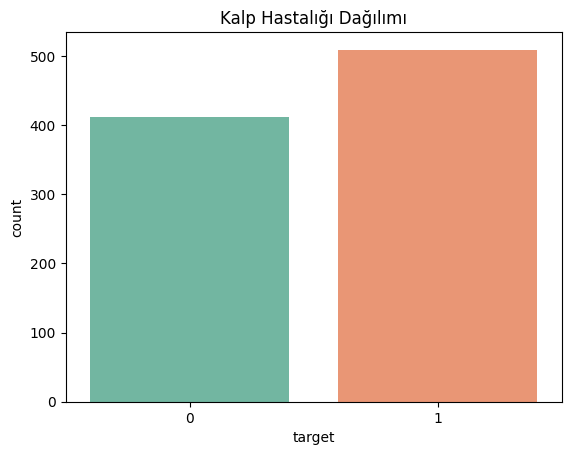

In [ ]:
# Hedef dağılımı
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Kalp Hastalığı Dağılımı")
plt.show()

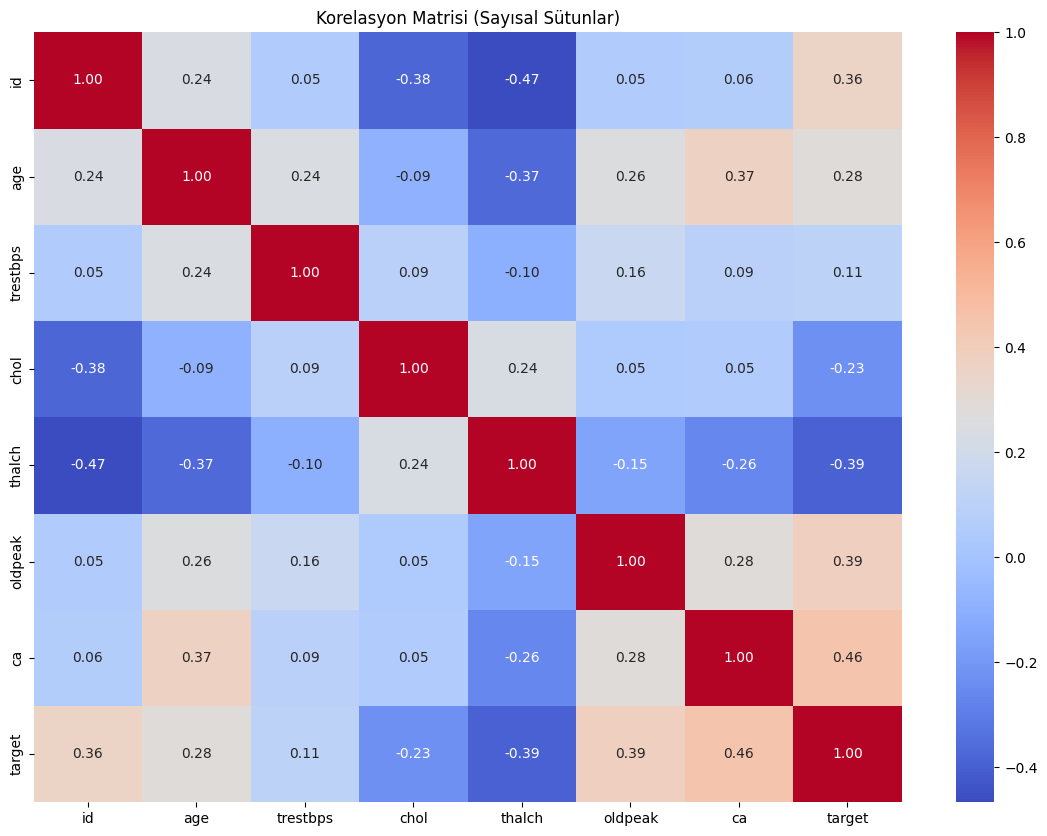

In [ ]:
# Korelasyon
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi (Sayısal Sütunlar)")
plt.show()

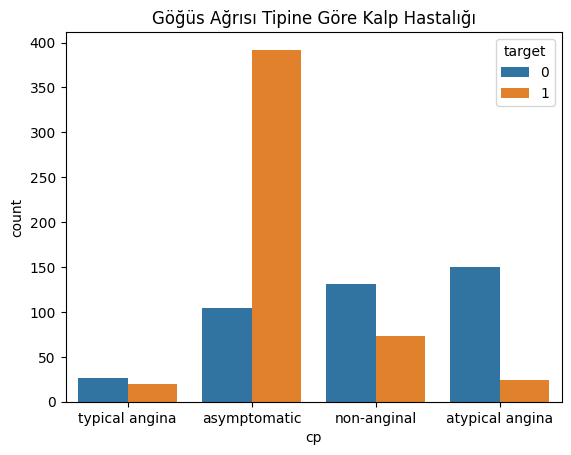

In [ ]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Göğüs Ağrısı Tipine Göre Kalp Hastalığı")
plt.show()

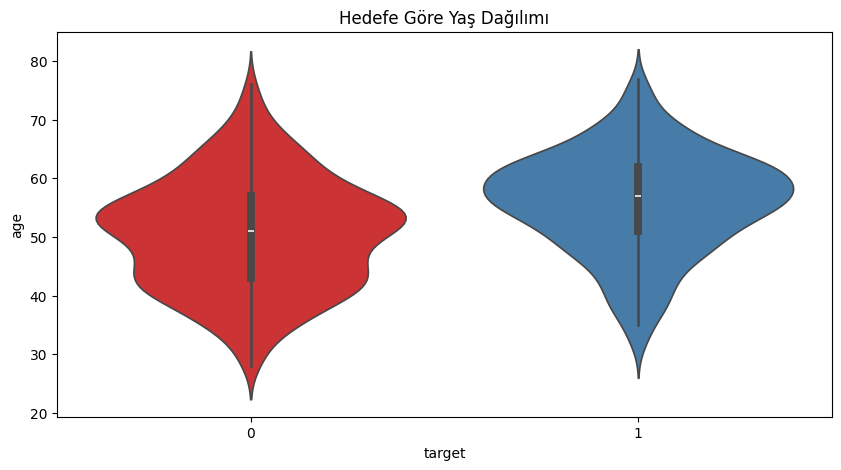

In [ ]:
# Yaşa göre hedef dağılımı
plt.figure(figsize=(10, 5))
sns.violinplot(x='target', y='age', data=df, palette='Set1')
plt.title("Hedefe Göre Yaş Dağılımı")
plt.show()

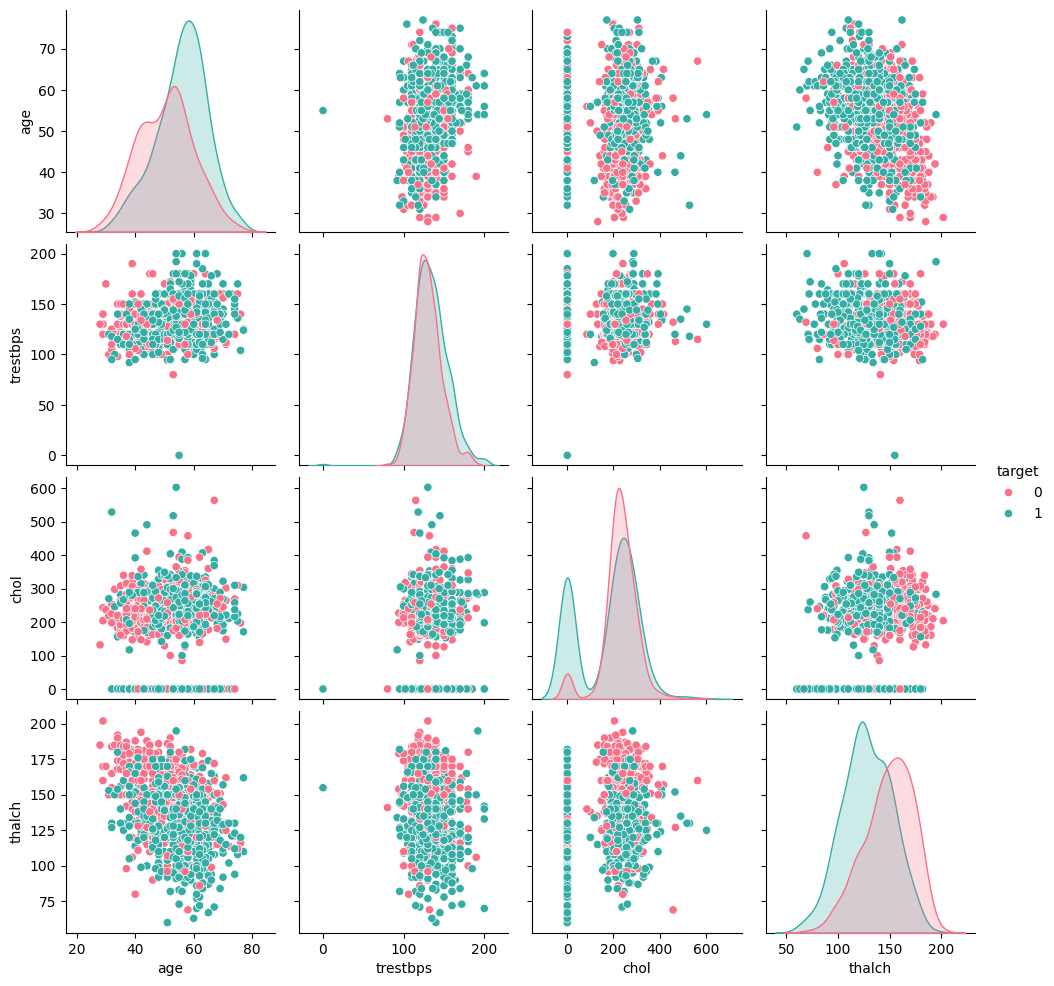

In [ ]:
# Pairplot
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'target']], hue='target', palette='husl')

# Veri Ön İşleme

In [ ]:
# Eksik verileri düzeltme

# Sayısal sütunları medyan ile doldur
num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Kategorik sütunları mod (en sık) ile doldur
cat_cols = ["fbs", "restecg", "exang", "slope", "thal"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Bağımsız ve bağımlı değişkenler
X = df.drop('target', axis=1)
y = df['target']


#  Kategorik verileri One-Hot Encode et
X_encoded = pd.get_dummies(X, drop_first=True)

# Sayısal değişkenleri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Eğitim/test ayrımı (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Modelleme

In [ ]:
# 1. Lojistik Regresyon
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Değerlendirme

In [ ]:
def evaluate(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name}\n")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(classification_report(y_true, y_pred))
    return [acc, prec, rec, f1]

results = []
results.append(evaluate(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate(y_test, y_pred_rf, "Random Forest"))


Logistic Regression

Accuracy:  0.8696
Precision: 0.8679
Recall:    0.9020
F1 Score:  0.8846
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


Random Forest

Accuracy:  0.8696
Precision: 0.8545
Recall:    0.9216
F1 Score:  0.8868
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        82
           1       0.85      0.92      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



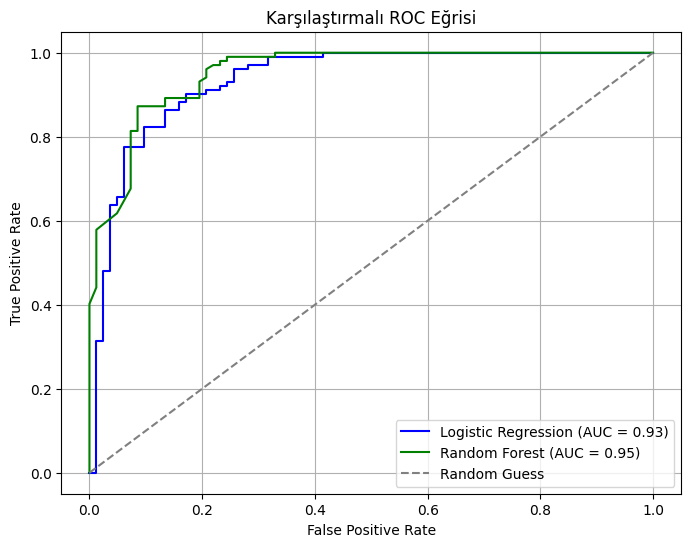

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Tahmin olasılıklarını al
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Grafik
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title("Karşılaştırmalı ROC Eğrisi")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# GridSearchCV & Feature Importance

In [ ]:
# 1. Logistic Regression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best params LR:", grid_lr.best_params_)

# En iyi model
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

Best params LR: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# 2. Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best params RF:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Best params RF: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
evaluate(y_test, y_pred_lr, "GridSearch Logistic Regression")
evaluate(y_test, y_pred_rf, "GridSearch Random Forest")


GridSearch Logistic Regression

Accuracy:  0.8424
Precision: 0.8288
Recall:    0.9020
F1 Score:  0.8638
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        82
           1       0.83      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


GridSearch Random Forest

Accuracy:  0.8804
Precision: 0.8509
Recall:    0.9510
F1 Score:  0.8981
              precision    recall  f1-score   support

           0       0.93      0.79      0.86        82
           1       0.85      0.95      0.90       102

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184



[0.8804347826086957,
 0.8508771929824561,
 0.9509803921568627,
 0.8981481481481481]

In [ ]:
# Daha Detaylı GridSearch ile Logistic Regression

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',  # veya 'f1' ile deneyebilirsin
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)
print("Best params LR:", grid_lr.best_params_)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

Best params LR: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Daha Detaylı GridSearch ile Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best params RF:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Best params RF: {'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
evaluate(y_test, y_pred_lr, "Detaylı GridSearch Logistic Regression")
evaluate(y_test, y_pred_rf, "Detaylı GridSearch Random Forest")


Detaylı GridSearch Logistic Regression

Accuracy:  0.8696
Precision: 0.8611
Recall:    0.9118
F1 Score:  0.8857
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


Detaylı GridSearch Random Forest

Accuracy:  0.8859
Precision: 0.8522
Recall:    0.9608
F1 Score:  0.9032
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        82
           1       0.85      0.96      0.90       102

    accuracy                           0.89       184
   macro avg       0.90      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184



[0.8858695652173914,
 0.8521739130434782,
 0.9607843137254902,
 0.9032258064516129]

### Model Sonuçlarının Yorumu

- **Genel Performans:**  
  Tüm modeller yüksek doğruluk (accuracy) ve dengeli performans metrikleri (precision, recall, f1-score) sergiliyor. Bu da modellerin kalp hastalığı var/yok sınıflandırmasında iyi çalıştığını gösteriyor.

- **Logistic Regression:**  
  Hem doğruluk hem de F1 skoru yüksek (yaklaşık %87), yani model doğru tahminlerde bulunuyor ve sınıflar arasında dengeli performans sağlıyor. Ancak diğer modellere göre biraz daha düşük precision ve recall değerleri var.

- **Random Forest:**  
  Logistic Regression’a çok yakın ama biraz daha iyi recall ve F1 skoruna sahip. Bu model hastalığı yakalama (recall) konusunda biraz daha başarılı. Özellikle hasta sınıfını kaçırma oranı daha düşük.

- **GridSearch Sonuçları:**  
  Hiperparametre optimizasyonu (GridSearch) Random Forest modeli için performansı artırmış (accuracy %88’e çıktı), bu da doğru parametrelerle modelin daha iyi genelleme yapabileceğini gösteriyor. Logistic Regression için ise biraz düşüş yaşanmış, bu bazen modelin parametre ayarlarının veri ile tam uyumlu olmamasından kaynaklanabilir.

- **Detaylı GridSearch:**  
  Daha ince ayarlarla yapılan GridSearch, hem Logistic Regression hem Random Forest modellerinin performansını stabilize edip biraz daha artırmış. Özellikle Random Forest’ta recall ve F1 skorunda anlamlı iyileşme var.

---

### Pratik Kullanım Açısından

- Random Forest, özellikle hastaları doğru tanımlamada daha başarılı görünüyor, bu nedenle klinik uygulamalarda tercih edilebilir.
- Logistic Regression ise daha basit ve yorumlanabilir olması nedeniyle başlangıç modeli olarak kullanılabilir.
- İyi ayarlanmış hiperparametreler model performansını artırıyor; bu nedenle model optimizasyonu kritik önemde.

---

### Veri Seti ve Model Geliştirme

- Veri seti dengeli ve yeterince büyük, bu da modellerin genelleme yeteneği için iyi.
- Performansı daha da artırmak için veri ön işleme (eksik verilerin doğru yönetimi, anormal değer temizliği), özellik mühendisliği ve daha karmaşık modeller denenebilir.
- Model sonuçlarının yorumlanabilirliği için özellikle Logistic Regression değerleri ve Random Forest özellik önemleri incelenmeli.

---

Özetle, elde edilen modeller kalp hastalığı tahmininde oldukça başarılı ve uygun hiperparametre optimizasyonuyla performansları daha da geliştirilebilir.


### Ek Olarak Neler Yapılabilir?

- **Daha Fazla Veri Toplama ve Zenginleştirme:**  
  Model performansını artırmak için veri setini büyütmek, farklı hastanelerden veya coğrafi bölgelerden veri eklemek faydalı olabilir. Ayrıca, hastaların yaşam tarzı, genetik bilgiler gibi ek özellikler modele değer katabilir.

- **Eksik ve Anormal Veri İşleme:**  
  Eksik değerlerin daha sofistike yöntemlerle (örneğin, model tabanlı imputasyon, KNN imputasyonu) doldurulması, aykırı değerlerin dikkatlice temizlenmesi ya da modellenmesi modelin doğruluğunu artırabilir.

- **Daha Gelişmiş Model ve Teknikler:**  
  - Ensemble yöntemlerinin çeşitlendirilmesi (XGBoost, LightGBM, CatBoost gibi)  
  - Derin öğrenme yöntemlerinin (örneğin yapay sinir ağları) denenmesi  
  - Model kombinasyonu (stacking, blending) ile farklı modellerin güçlendirilmesi  

- **Özellik Mühendisliği:**  
  Yeni özellikler oluşturmak, mevcut özelliklerin dönüştürülmesi (örneğin polinomiyal özellikler, etkileşim terimleri) modeli daha güçlü yapabilir.

- **Model Açıklanabilirliği ve Güvenilirlik:**  
  SHAP, LIME gibi yöntemlerle model kararlarının anlaşılması, sağlık alanında modelin kabulünü kolaylaştırır. Ayrıca, modelin hata yaptığı örneklerin analizi yapılabilir.

- **Dengeli Sınıflandırma Teknikleri:**  
  Eğer veri setinde sınıf dengesizliği varsa SMOTE, ADASYN gibi yöntemlerle denge sağlanabilir.
